Hyperparameter Tuning in Decision Trees
https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees/data?select=heart_v2.csv

In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [12]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv("/home/gaio/Documents/GitHub/iod-linux/DATA/heart_v2.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [11]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [22]:
df.shape

(270, 5)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            270 non-null    int64  
 1   sex            270 non-null    int64  
 2   BP             270 non-null    float64
 3   cholestrol     270 non-null    float64
 4   heart disease  270 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 10.7 KB


In [80]:
df['sex'].value_counts()

1    183
0     87
Name: sex, dtype: int64

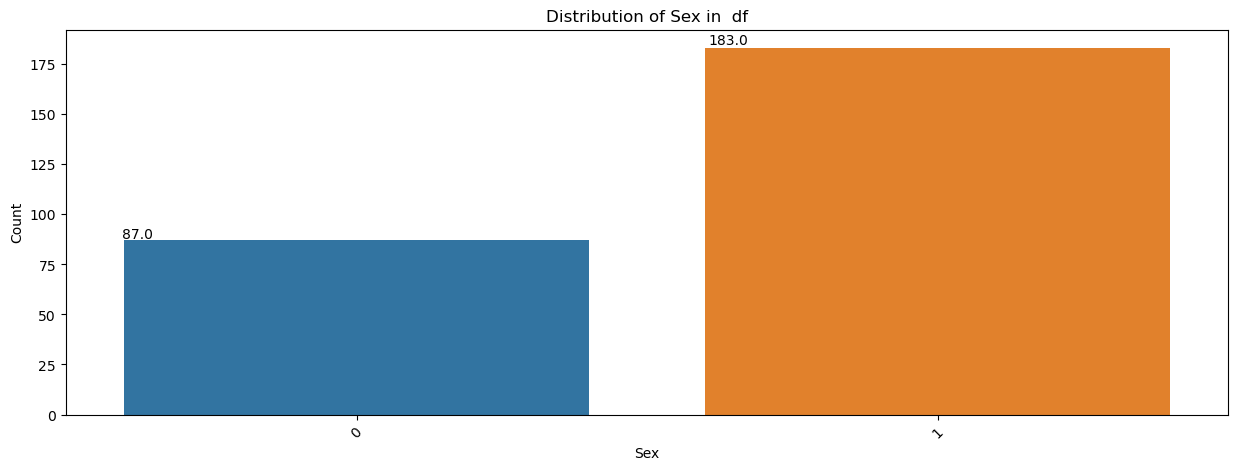

In [87]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='sex', data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=45)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in  df')
plt.show()

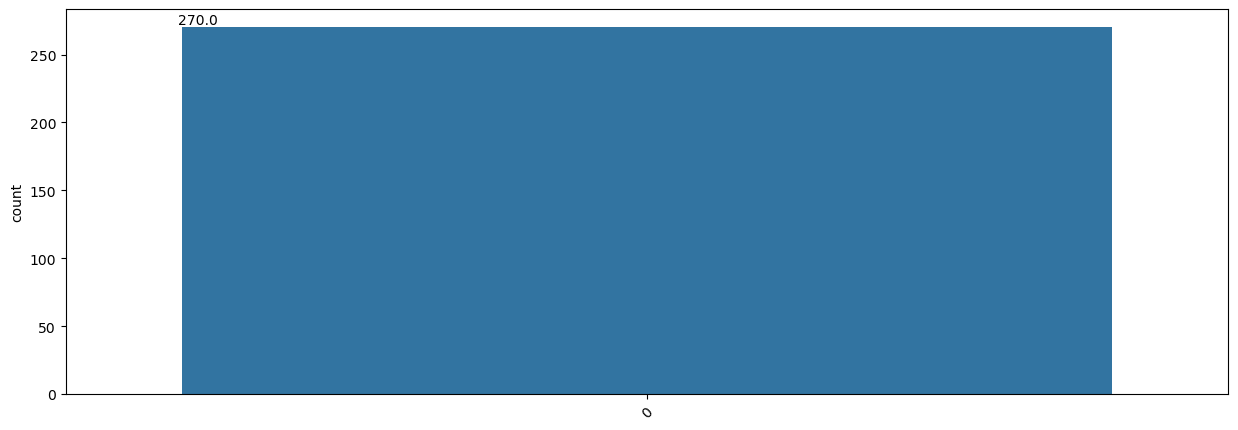

In [86]:


plt.figure(figsize = (15,5))
ax= sns.countplot(df['sex'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()


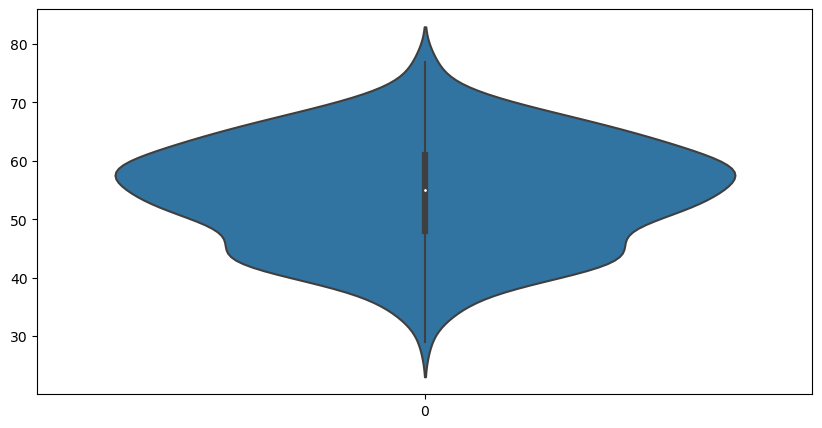

In [13]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['age'])
plt.show()

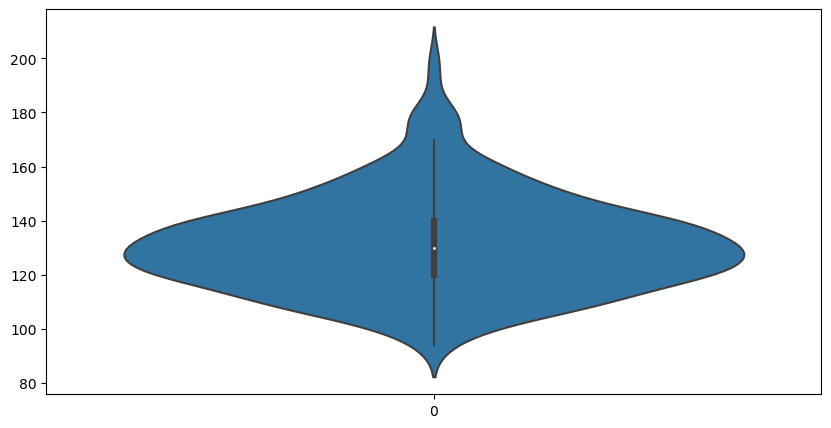

In [15]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['BP'])
plt.show()


In [16]:


percentiles = df['BP'].quantile([0.05,0.95]).values
df['BP'][df['BP'] <= percentiles[0]] = percentiles[0]
df['BP'][df['BP'] >= percentiles[1]] = percentiles[1]



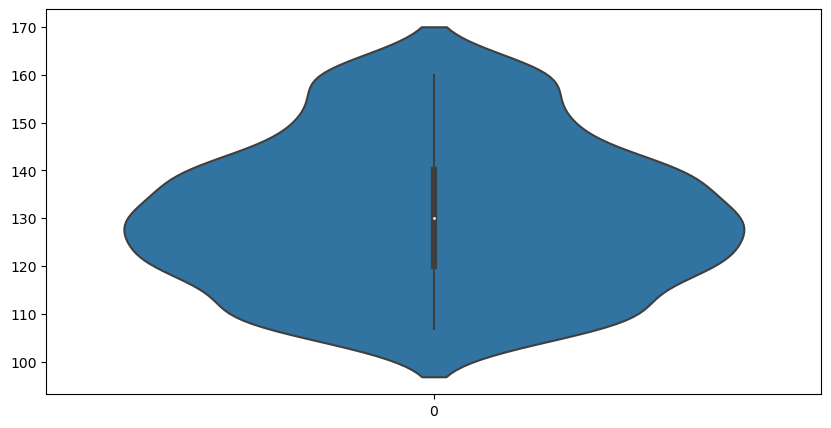

In [17]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['BP'])
plt.show()

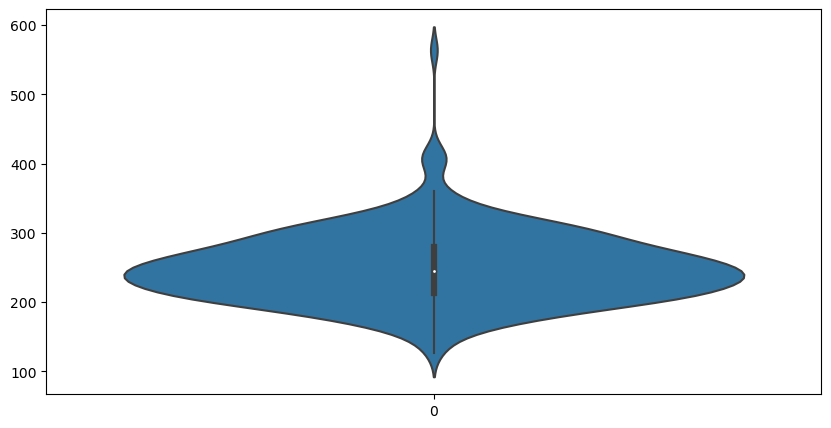

In [18]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['cholestrol'])
plt.show()

In [19]:
percentiles = df['cholestrol'].quantile([0.05,0.95]).values
df['cholestrol'][df['cholestrol'] <= percentiles[0]] = percentiles[0]
df['cholestrol'][df['cholestrol'] >= percentiles[1]] = percentiles[1]

/tmp/ipykernel_12961/1187636177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cholestrol'][df['cholestrol'] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_12961/1187636177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cholestrol'][df['cholestrol'] >= percentiles[1]] = percentiles[1]


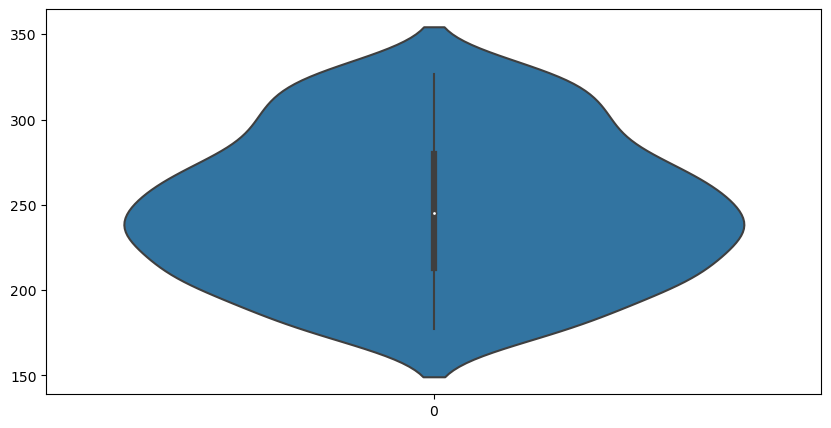

In [20]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['cholestrol'])
plt.show()

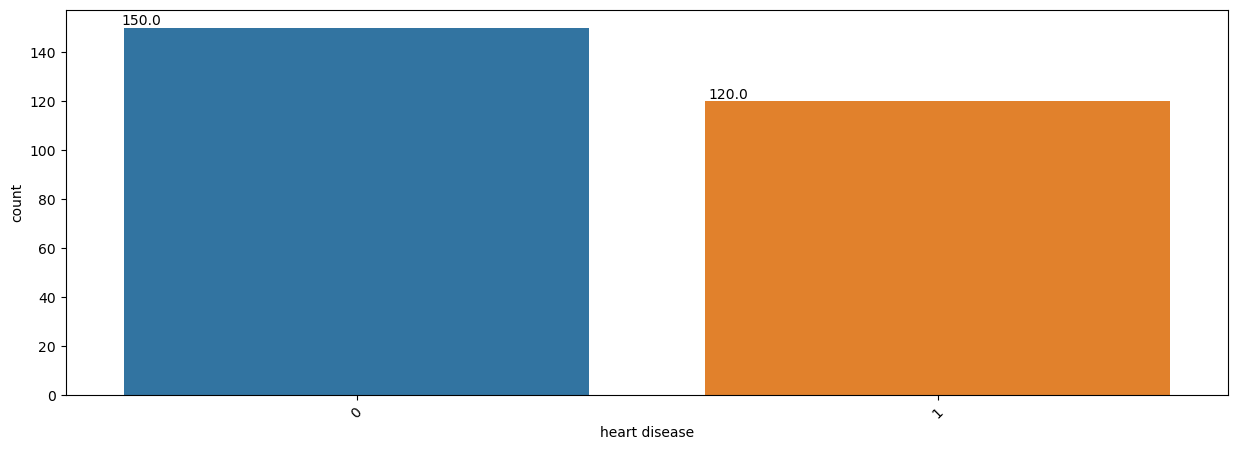

In [88]:



plt.figure(figsize = (15,5))
ax= sns.countplot(x= 'heart disease', data= df)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()




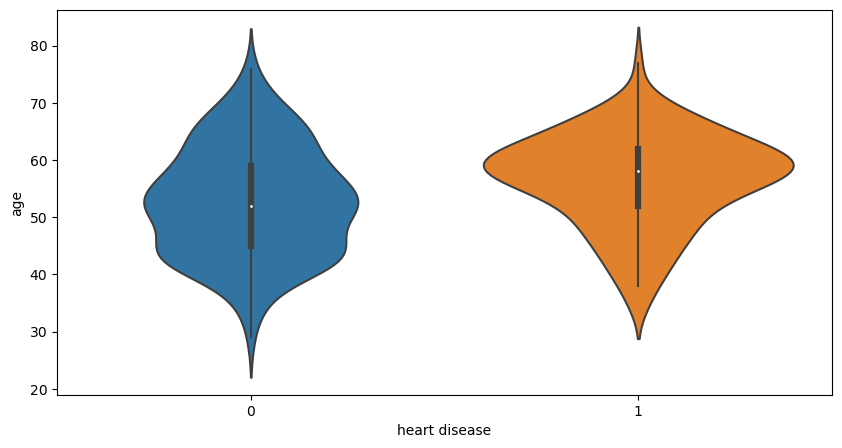

In [29]:


plt.figure(figsize = (10,5))
sns.violinplot(y = 'age', x = 'heart disease', data = df)
plt.show()



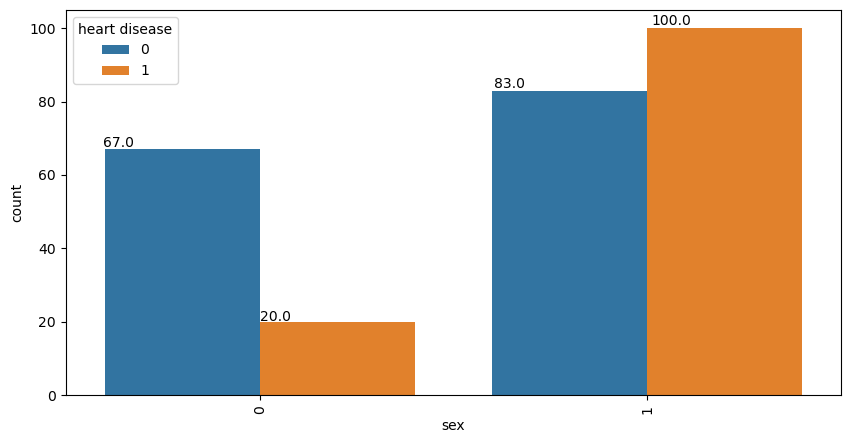

In [30]:


plt.figure(figsize = (10,5))
ax= sns.countplot(x = "sex", hue = "heart disease", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()



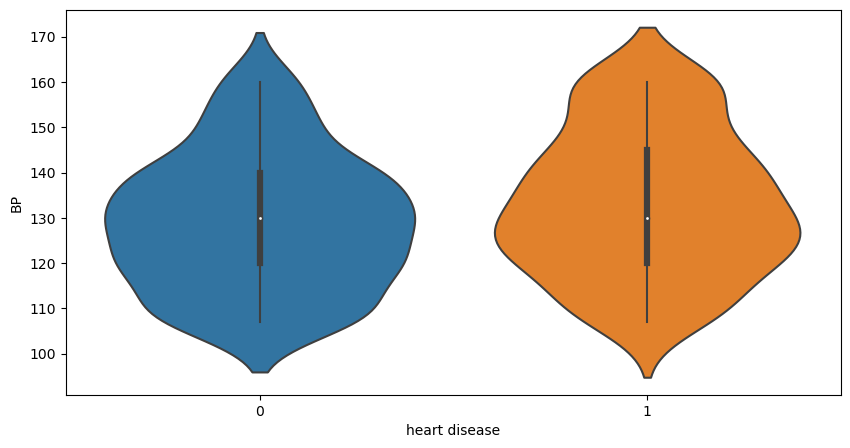

In [31]:


plt.figure(figsize = (10,5))
sns.violinplot(y = 'BP', x = 'heart disease', data = df)
plt.show()



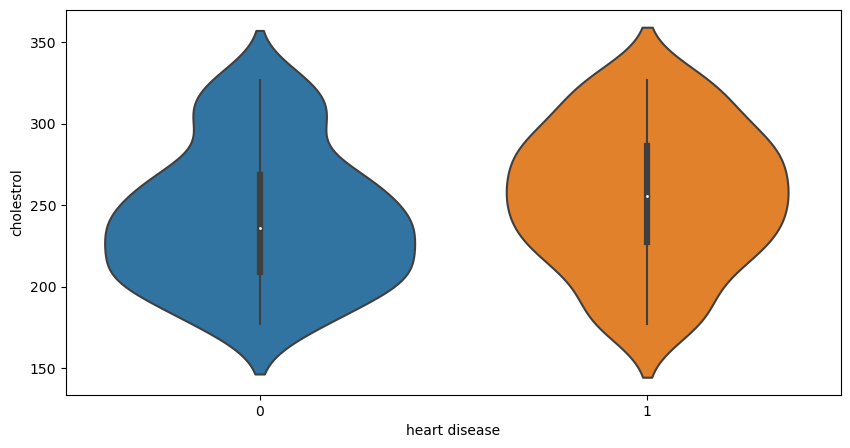

In [32]:


plt.figure(figsize = (10,5))
sns.violinplot(y = 'cholestrol', x = 'heart disease', data = df)
plt.show()



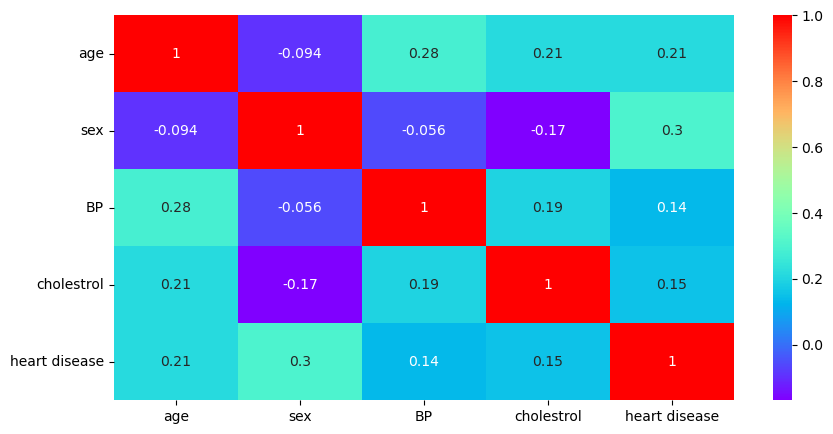

In [33]:


plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()



In [34]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,130.824444,247.895185,0.444444
std,9.109067,0.468195,15.387319,42.641693,0.497827
min,29.000000,0.000000,106.900000,177.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,160.000000,326.550000,1.000000


In [35]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']


In [36]:


from sklearn.model_selection import train_test_split



In [37]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)
X_train.shape, X_test.shape



((162, 4), (108, 4))

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

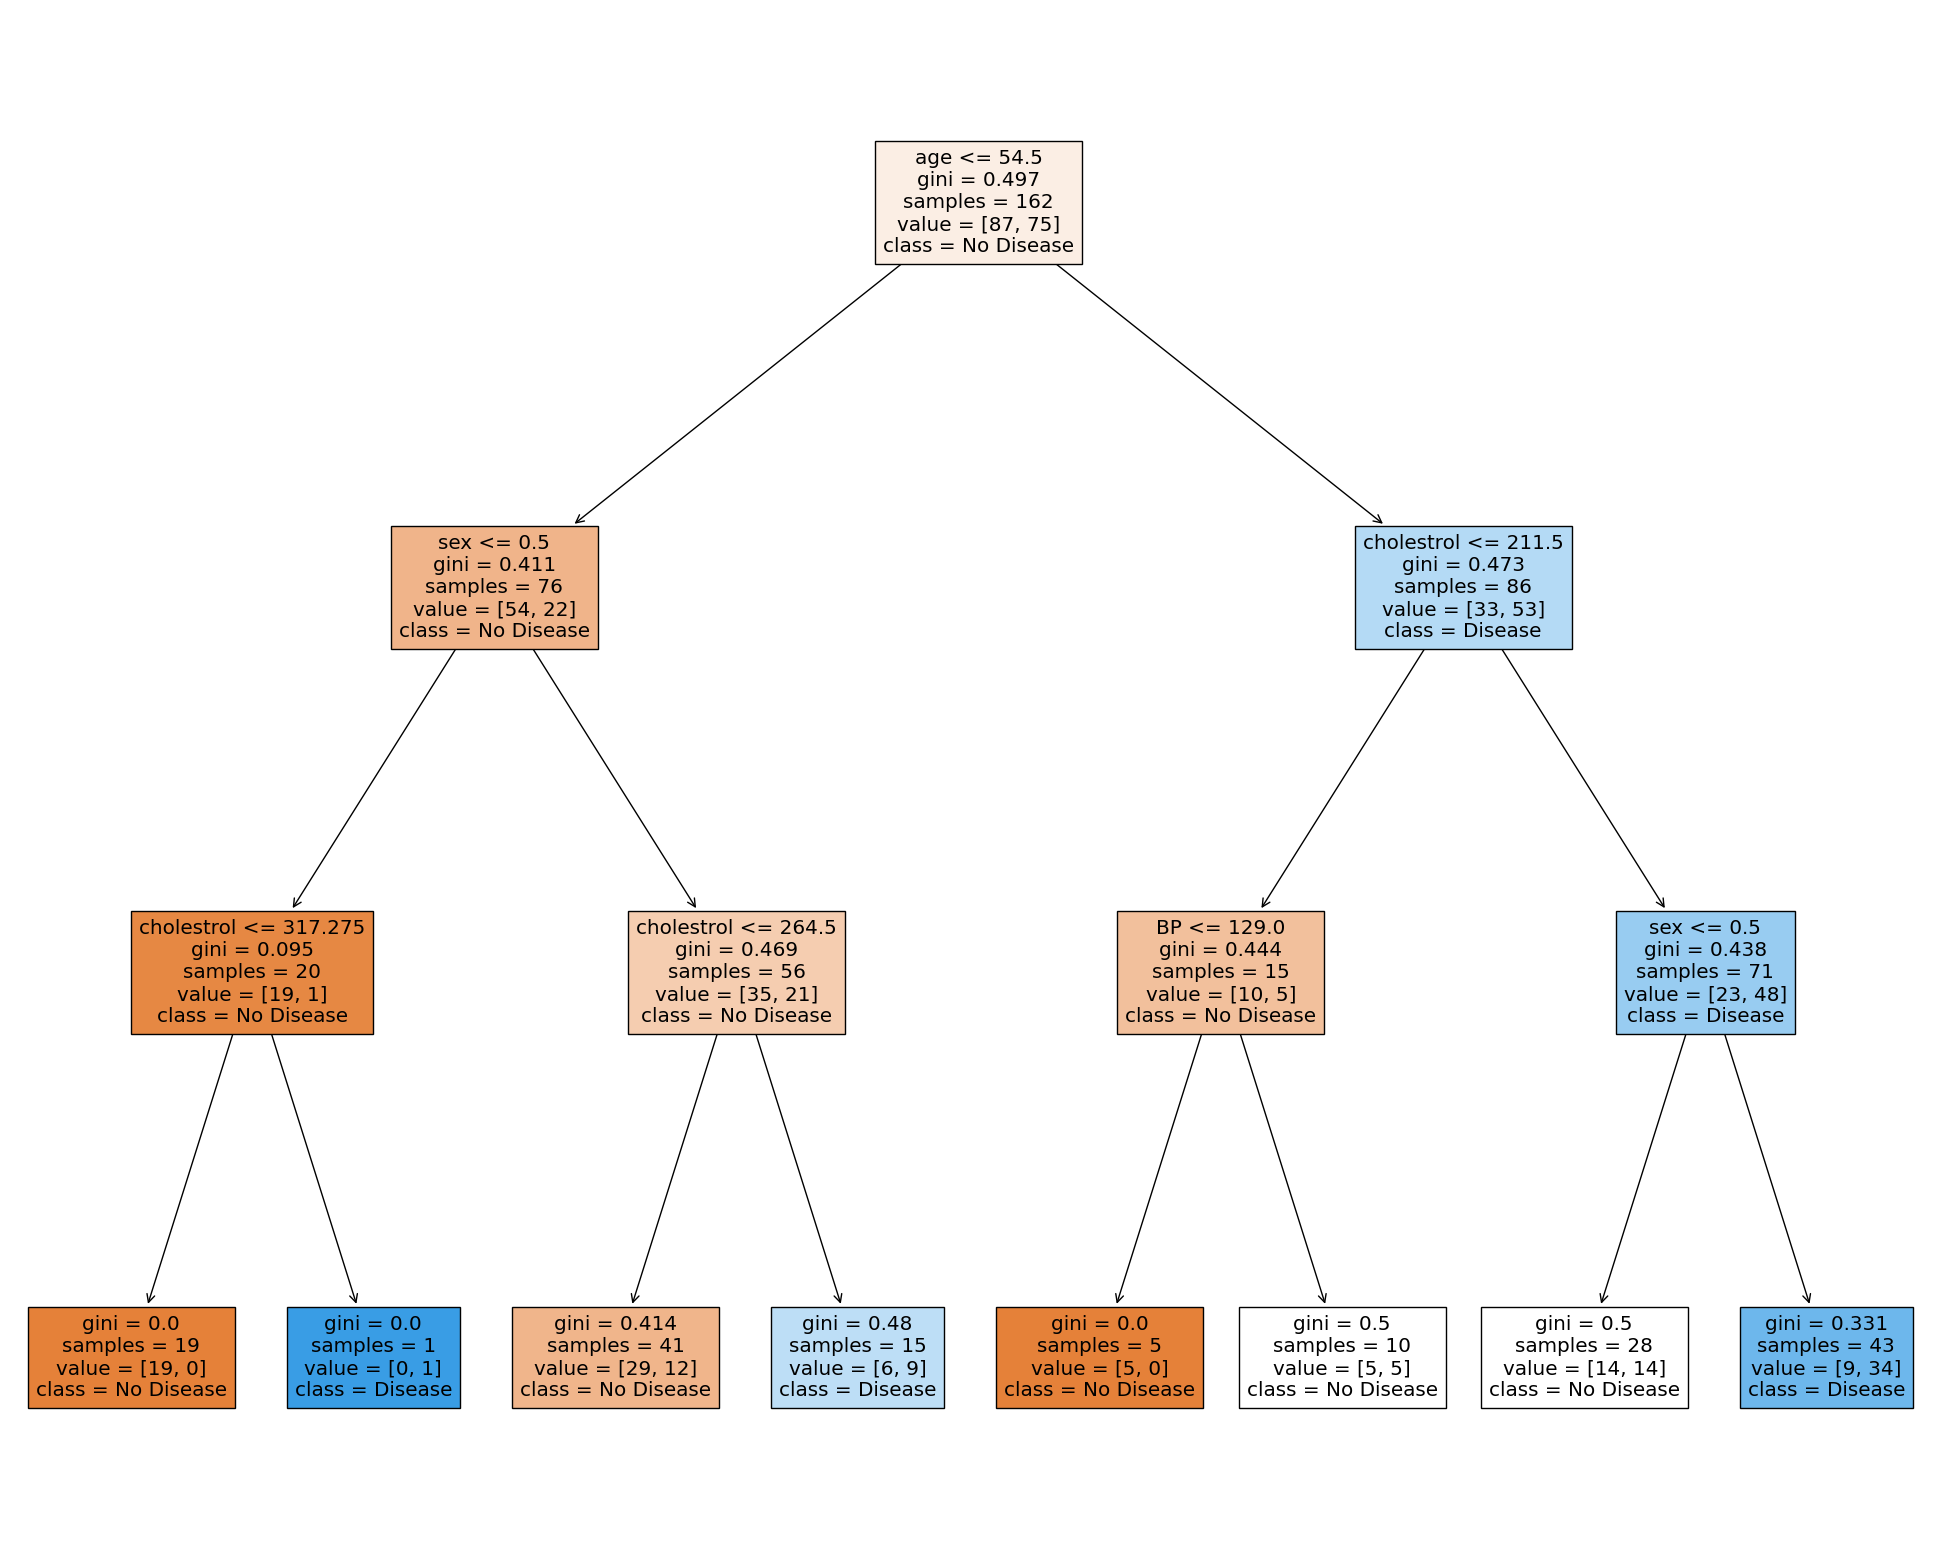

In [40]:


from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)




Evaluating model performance


In [41]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7160493827160493


array([[72, 15],
       [31, 44]])

In [44]:


print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)



0.7037037037037037


array([[51, 12],
       [20, 25]])

In [45]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

In [46]:


def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))




Without setting any hyper-parameters


In [47]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

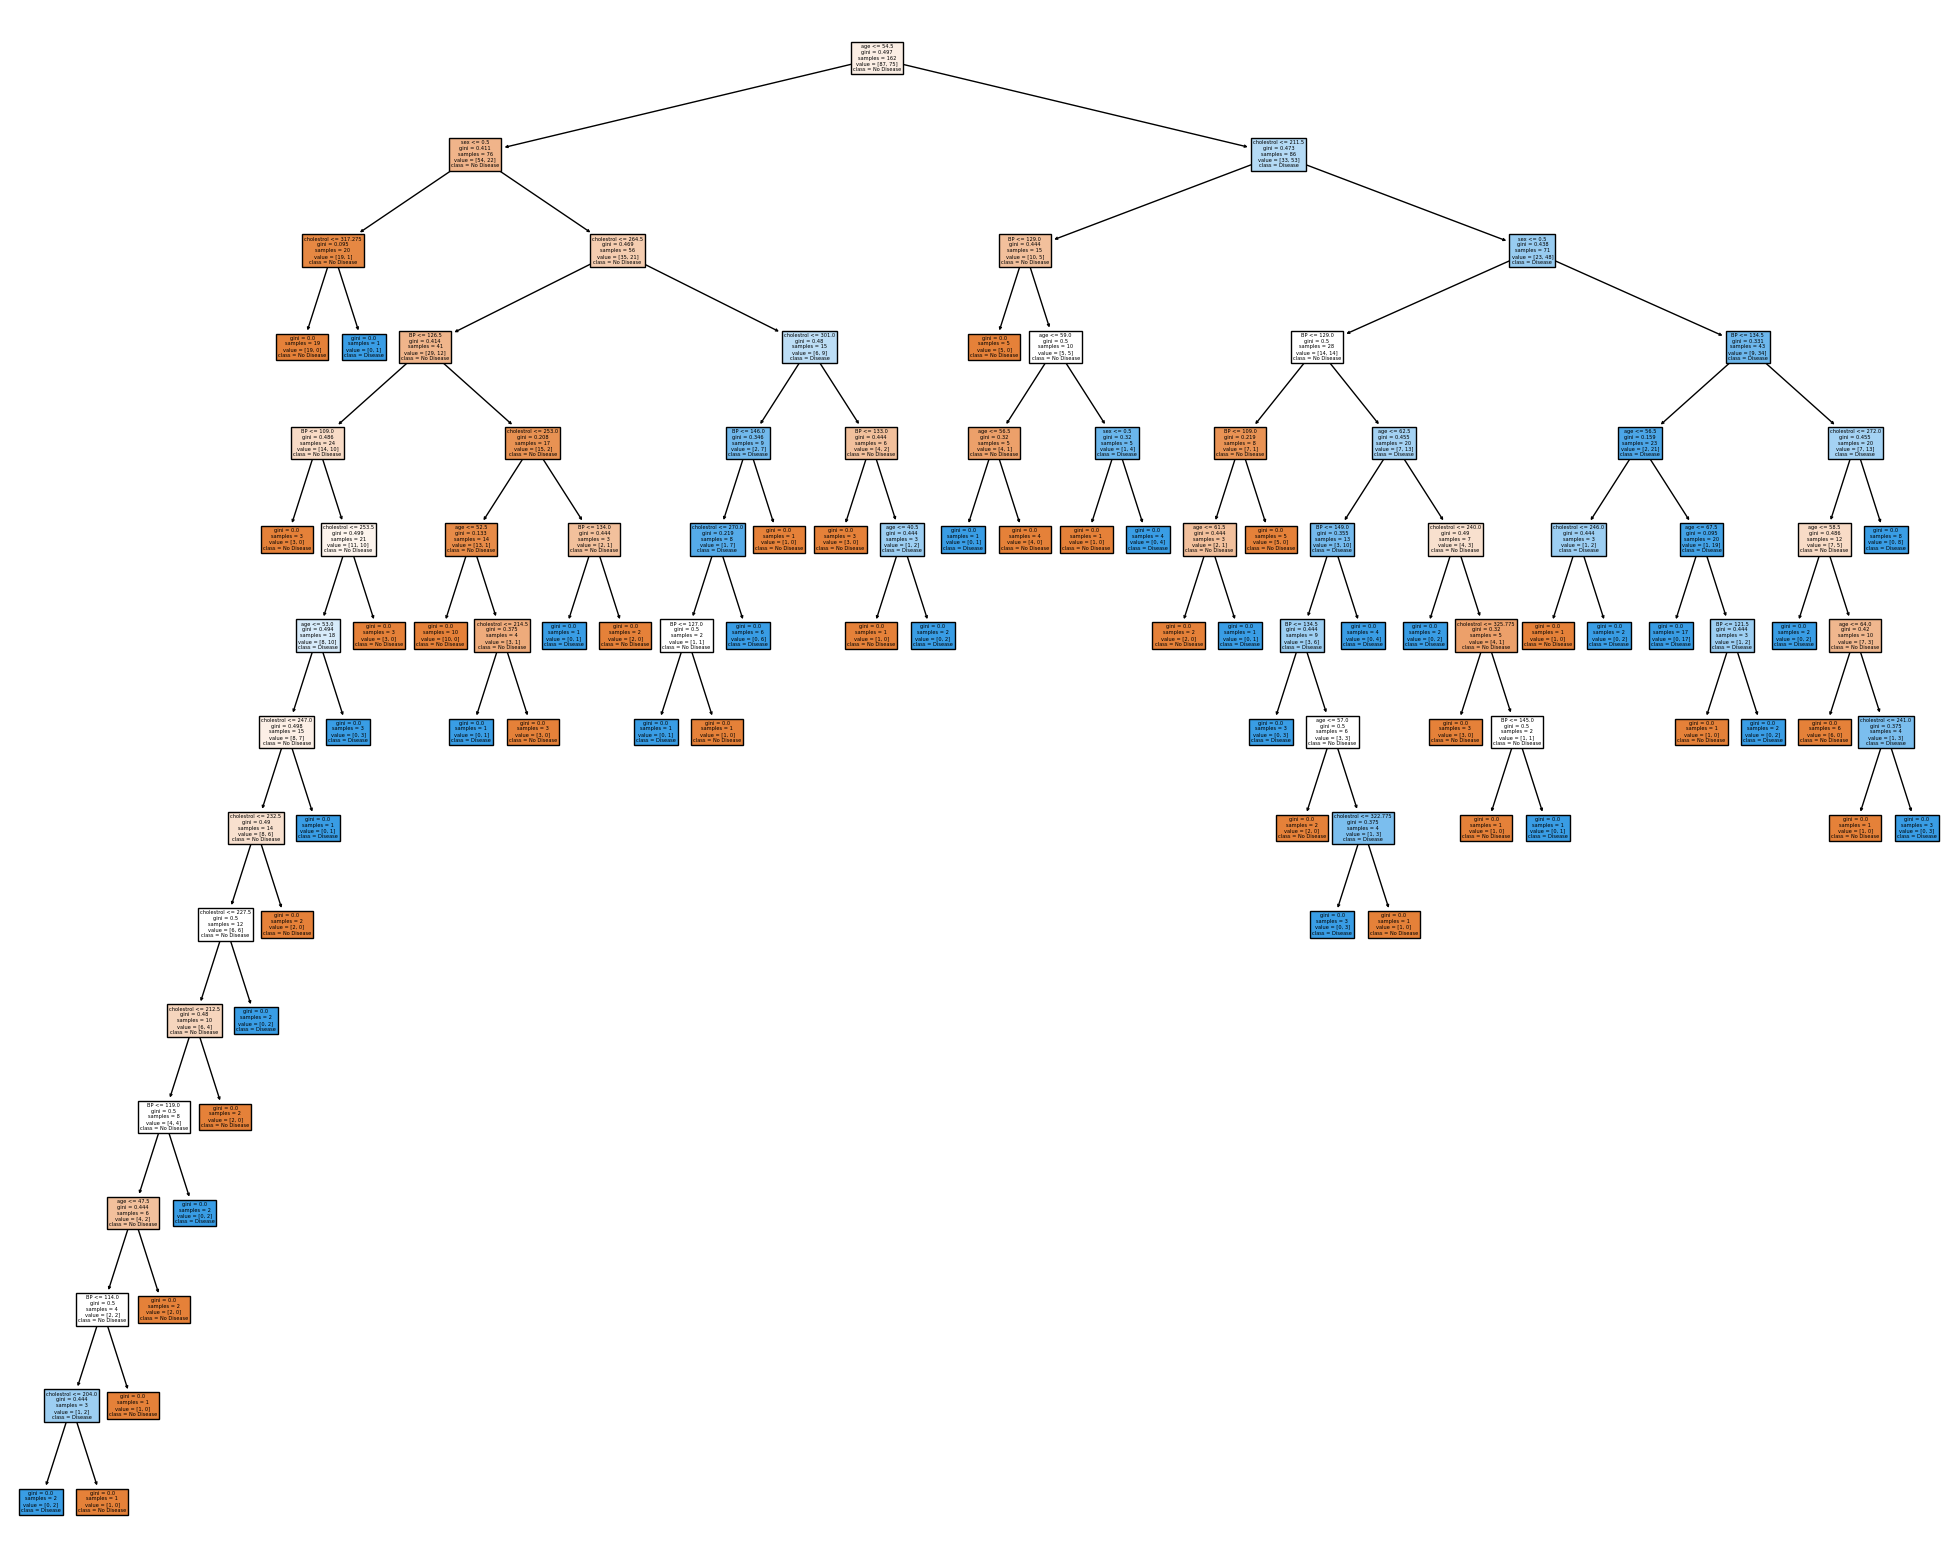

In [48]:
gph = get_dt_graph(dt_default)

In [49]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[87  0]
 [ 0 75]]
--------------------------------------------------
Test Accuracy : 0.7222222222222222
Test Confusion Matrix:
[[46 17]
 [13 32]]



Controlling the depth of the tree


In [105]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

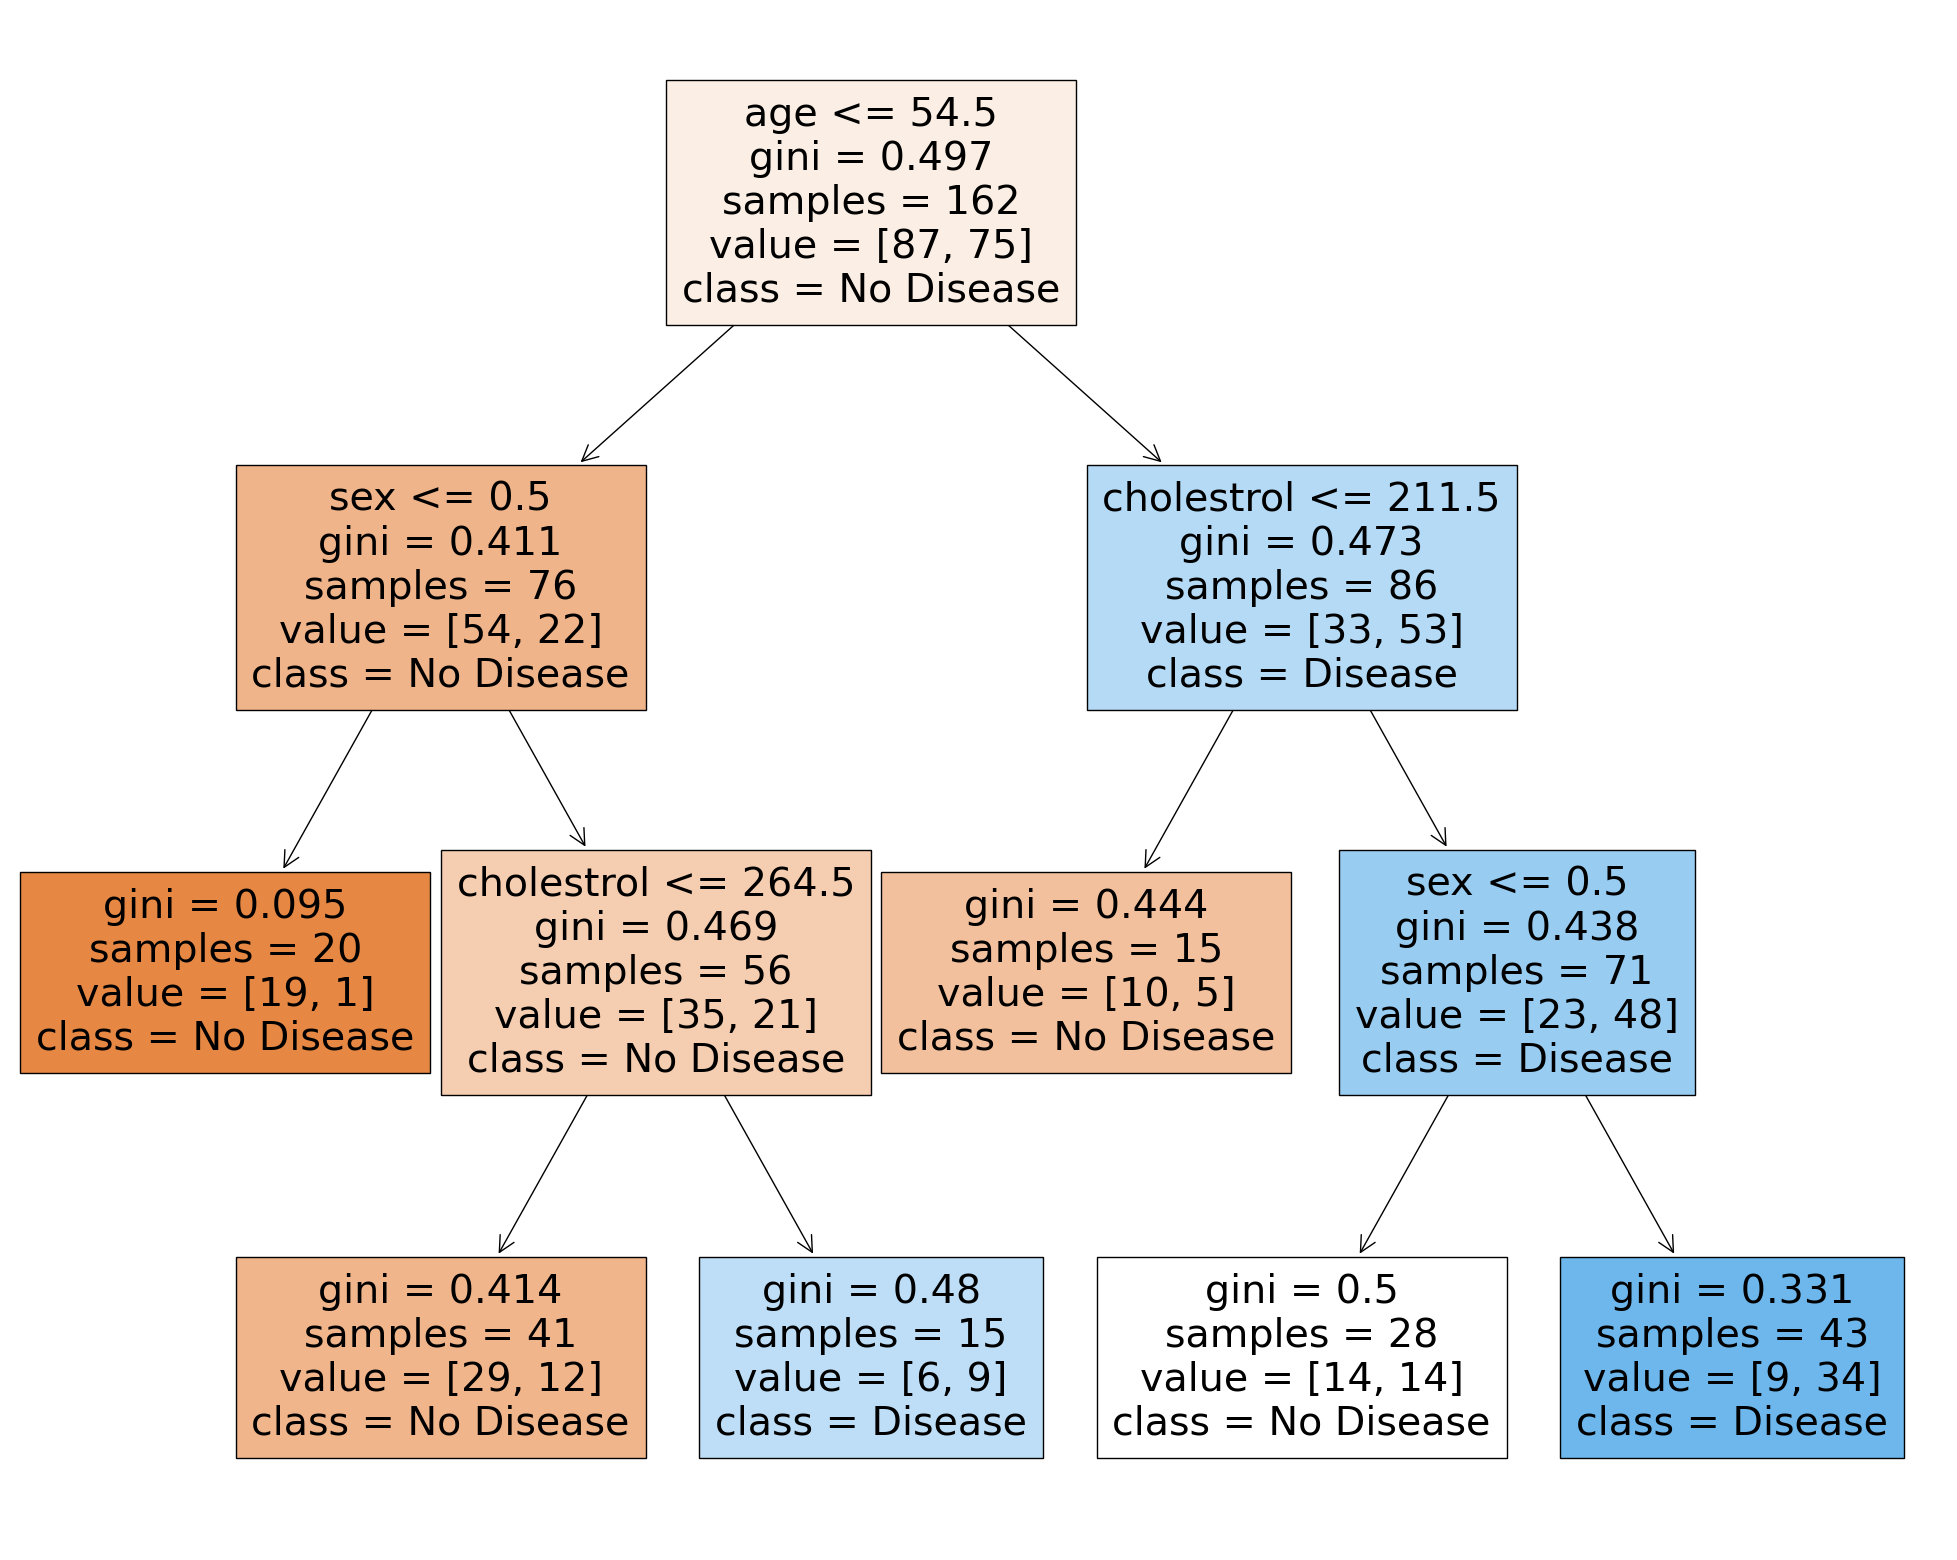

In [103]:
gph = get_dt_graph(dt_depth) 

In [104]:
evaluate_model(dt_depth)

Train Accuracy : 0.7098765432098766
Train Confusion Matrix:
[[72 15]
 [32 43]]
--------------------------------------------------
Test Accuracy : 0.7037037037037037
Test Confusion Matrix:
[[51 12]
 [20 25]]



Specifying minimum samples before split


In [55]:


dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)



DecisionTreeClassifier(min_samples_split=20)

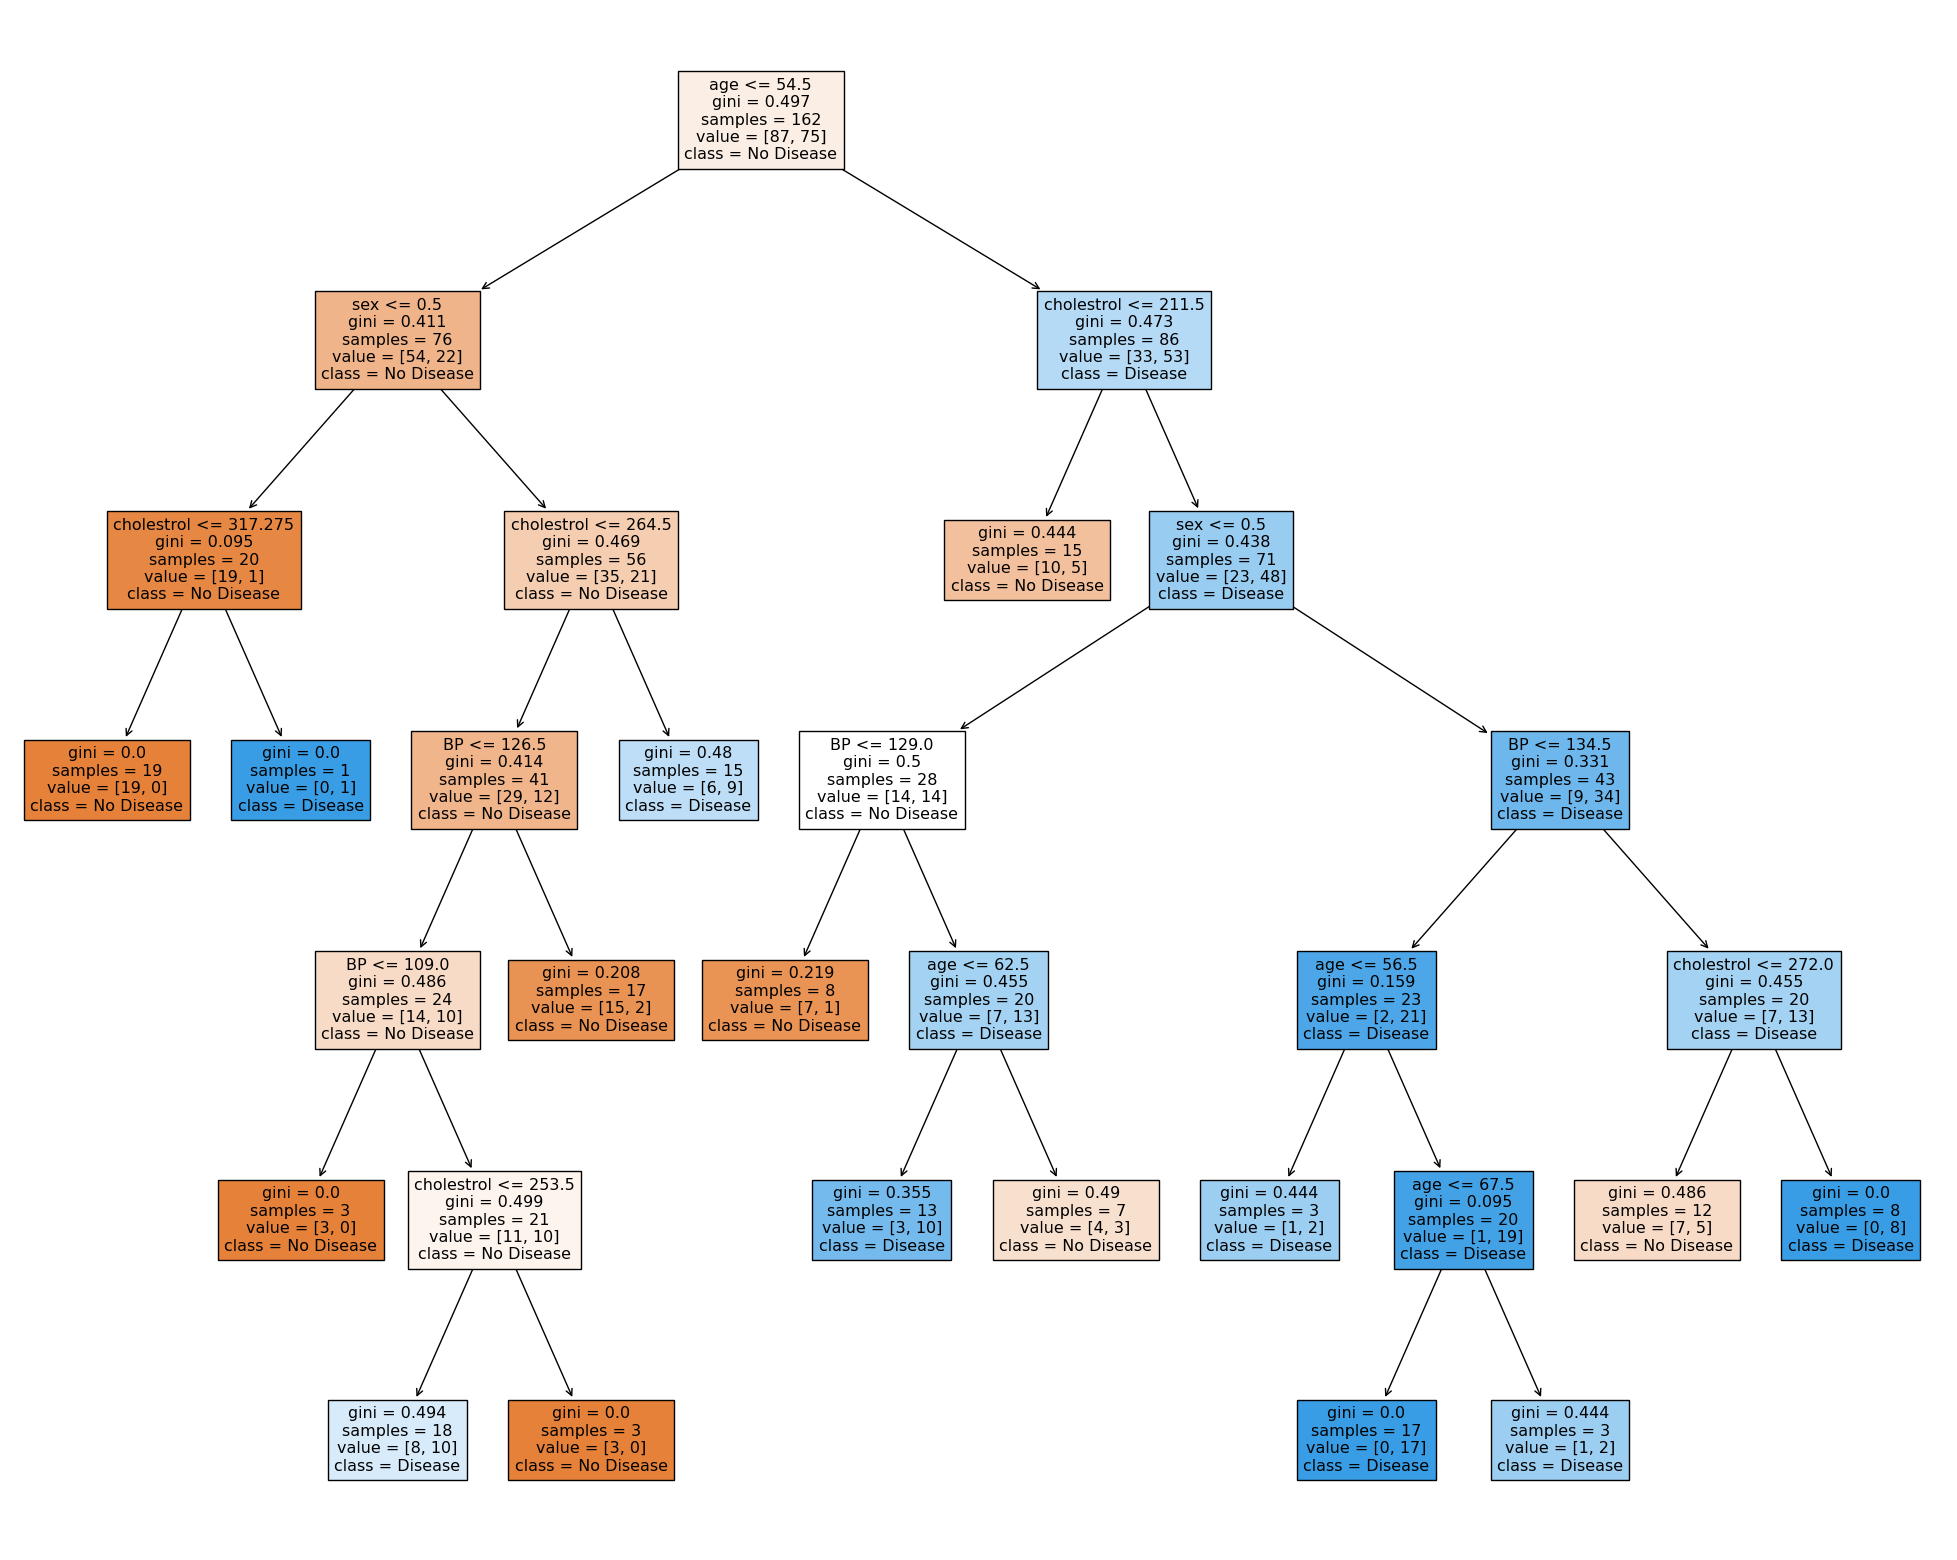

In [56]:
gph = get_dt_graph(dt_min_split) 

In [57]:
evaluate_model(dt_min_split)

Train Accuracy : 0.7839506172839507
Train Confusion Matrix:
[[68 19]
 [16 59]]
--------------------------------------------------
Test Accuracy : 0.7222222222222222
Test Confusion Matrix:
[[47 16]
 [14 31]]



Specifying minimum samples in leaf node


In [59]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

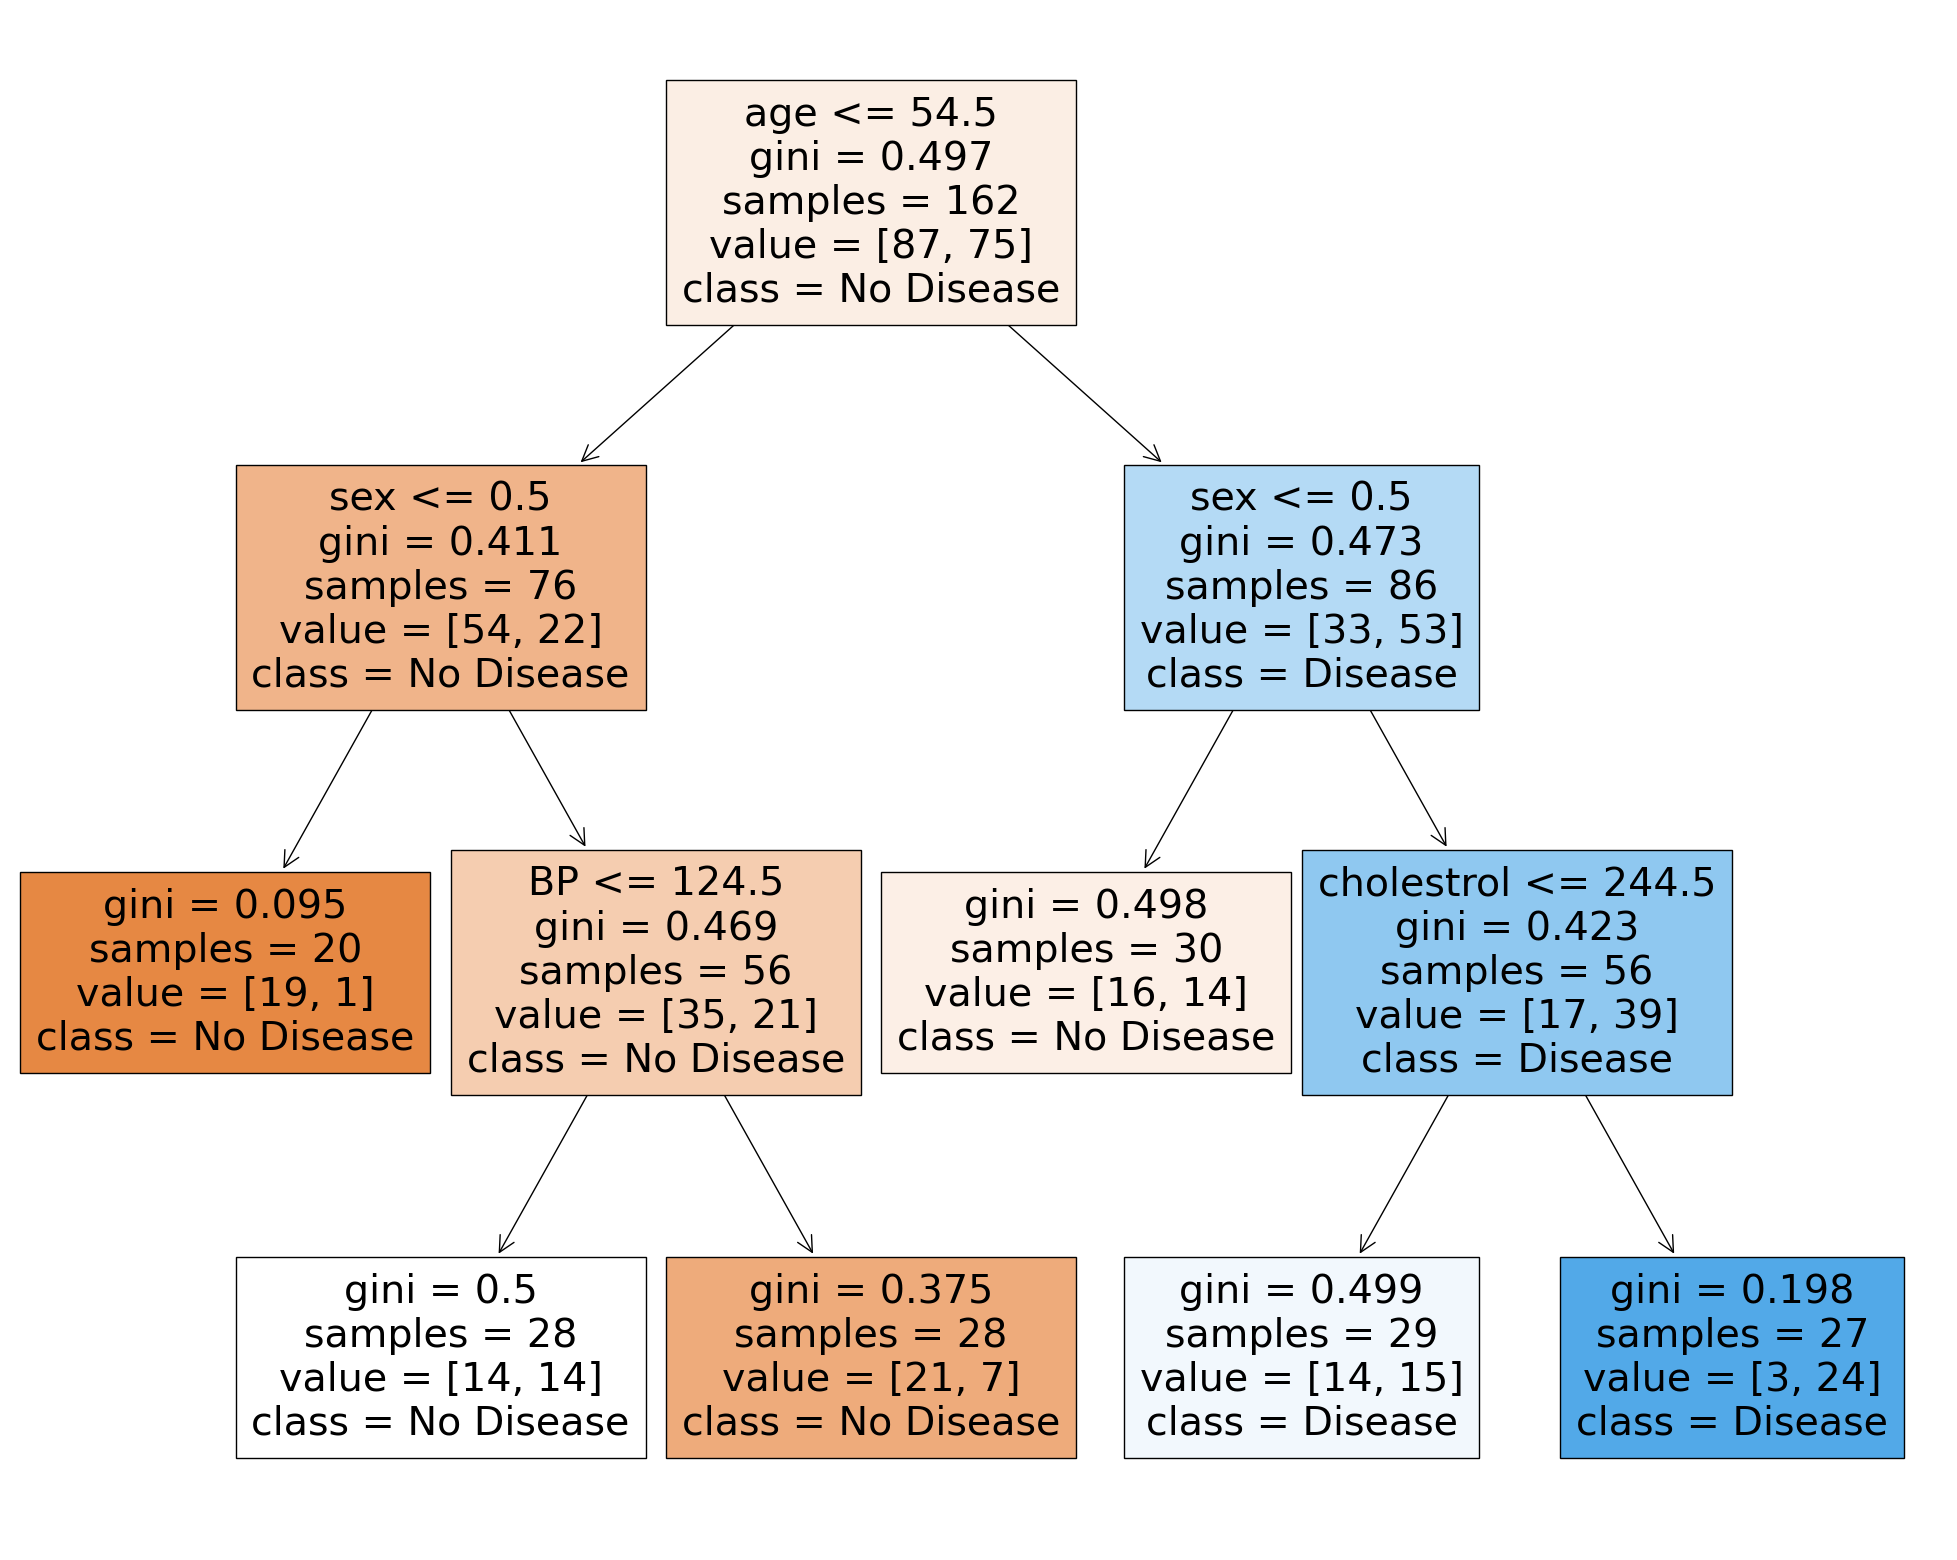

In [60]:
gph = get_dt_graph(dt_min_leaf)

In [61]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.6728395061728395
Train Confusion Matrix:
[[70 17]
 [36 39]]
--------------------------------------------------
Test Accuracy : 0.7037037037037037
Test Confusion Matrix:
[[53 10]
 [22 23]]


In [62]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

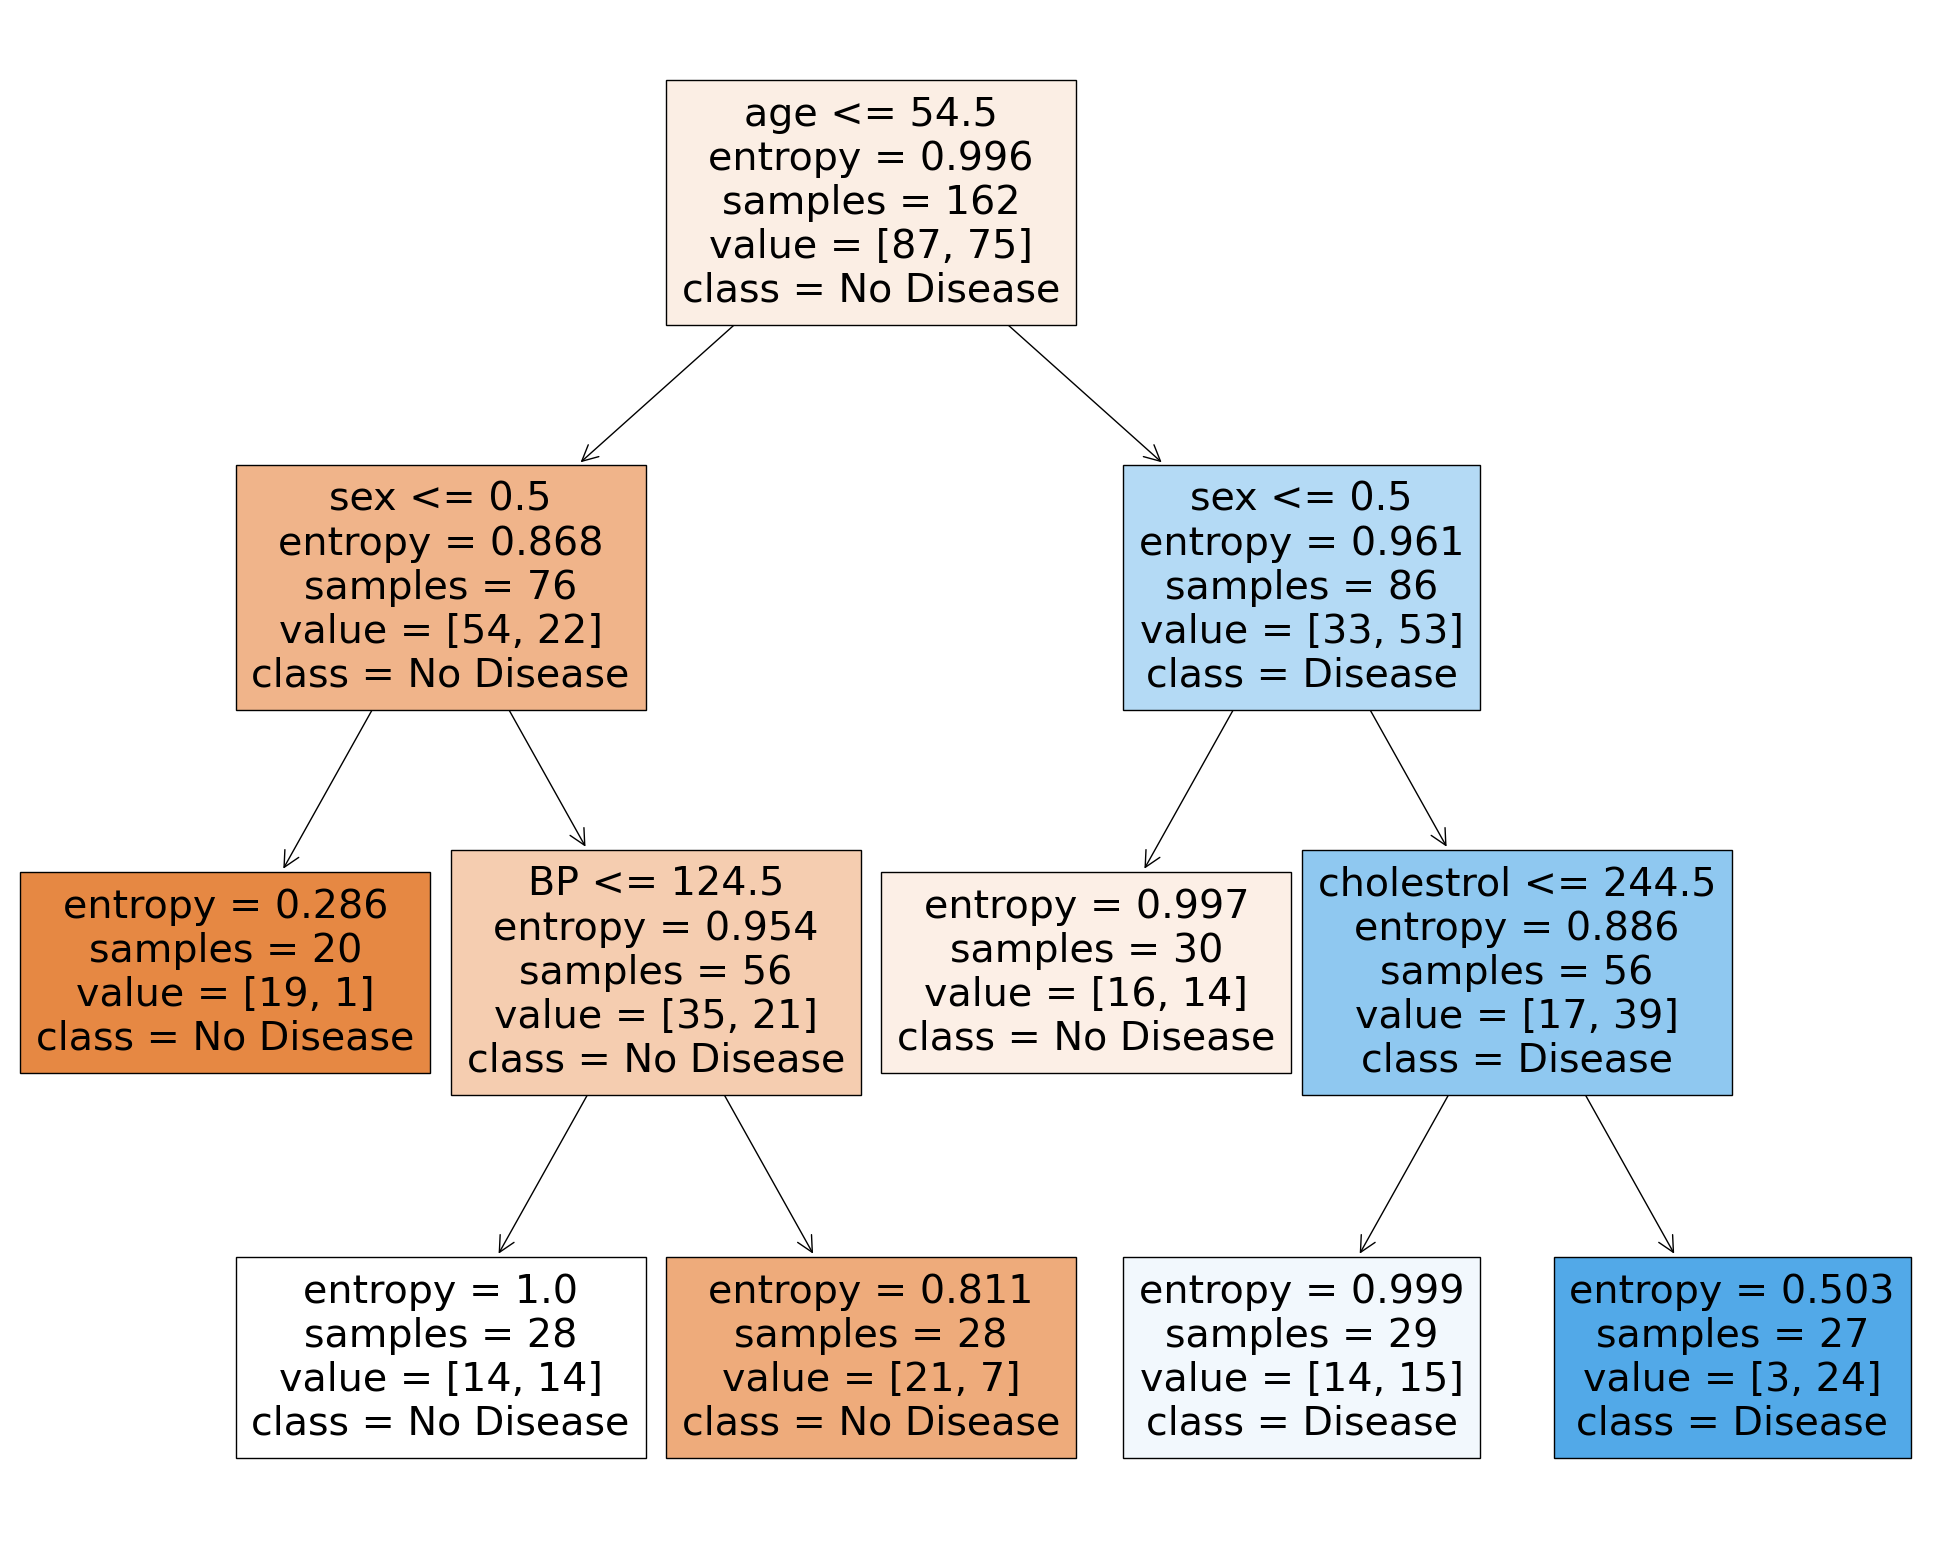

In [63]:
gph = get_dt_graph(dt_min_leaf_entropy)

In [64]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.6728395061728395
Train Confusion Matrix:
[[70 17]
 [36 39]]
--------------------------------------------------
Test Accuracy : 0.7037037037037037
Test Confusion Matrix:
[[53 10]
 [22 23]]



Hyper-parameter tuning


In [66]:
dt = DecisionTreeClassifier(random_state=42)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [106]:


grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")



In [110]:


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")



In [111]:
%%time
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 103 ms, sys: 5.21 ms, total: 108 ms
Wall time: 328 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [112]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003876,0.002405,0.001370,0.000036,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.707317,0.463415,0.675,0.600,0.611433,0.093908,11
1,0.002317,0.000040,0.003768,0.004115,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.707317,0.463415,0.650,0.600,0.605183,0.090229,13
2,0.005009,0.004584,0.001543,0.000260,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.682927,0.463415,0.650,0.600,0.599085,0.083709,18
3,0.002206,0.000110,0.001264,0.000023,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.658537,0.585366,0.700,0.700,0.660976,0.046820,1
4,0.004404,0.003129,0.005890,0.005845,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.536585,0.536585,0.550,0.525,0.537043,0.008851,41


In [73]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,0.002386,0.000095,0.001453,0.000072,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.658537,0.585366,0.7,0.7,0.660976,0.04682,1
8,0.002376,0.000176,0.001414,0.000070,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.658537,0.585366,0.7,0.7,0.660976,0.04682,1
13,0.002333,0.000515,0.001325,0.000040,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.658537,0.585366,0.7,0.7,0.660976,0.04682,1
18,0.002020,0.000077,0.001295,0.000015,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.658537,0.585366,0.7,0.7,0.660976,0.04682,1
23,0.002007,0.000060,0.004850,0.006142,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.658537,0.585366,0.7,0.7,0.660976,0.04682,1


In [74]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)

In [75]:
dt_best = grid_search.best_estimator_

In [76]:
evaluate_model(dt_best)

Train Accuracy : 0.6604938271604939
Train Confusion Matrix:
[[54 33]
 [22 53]]
--------------------------------------------------
Test Accuracy : 0.6018518518518519
Test Confusion Matrix:
[[38 25]
 [18 27]]


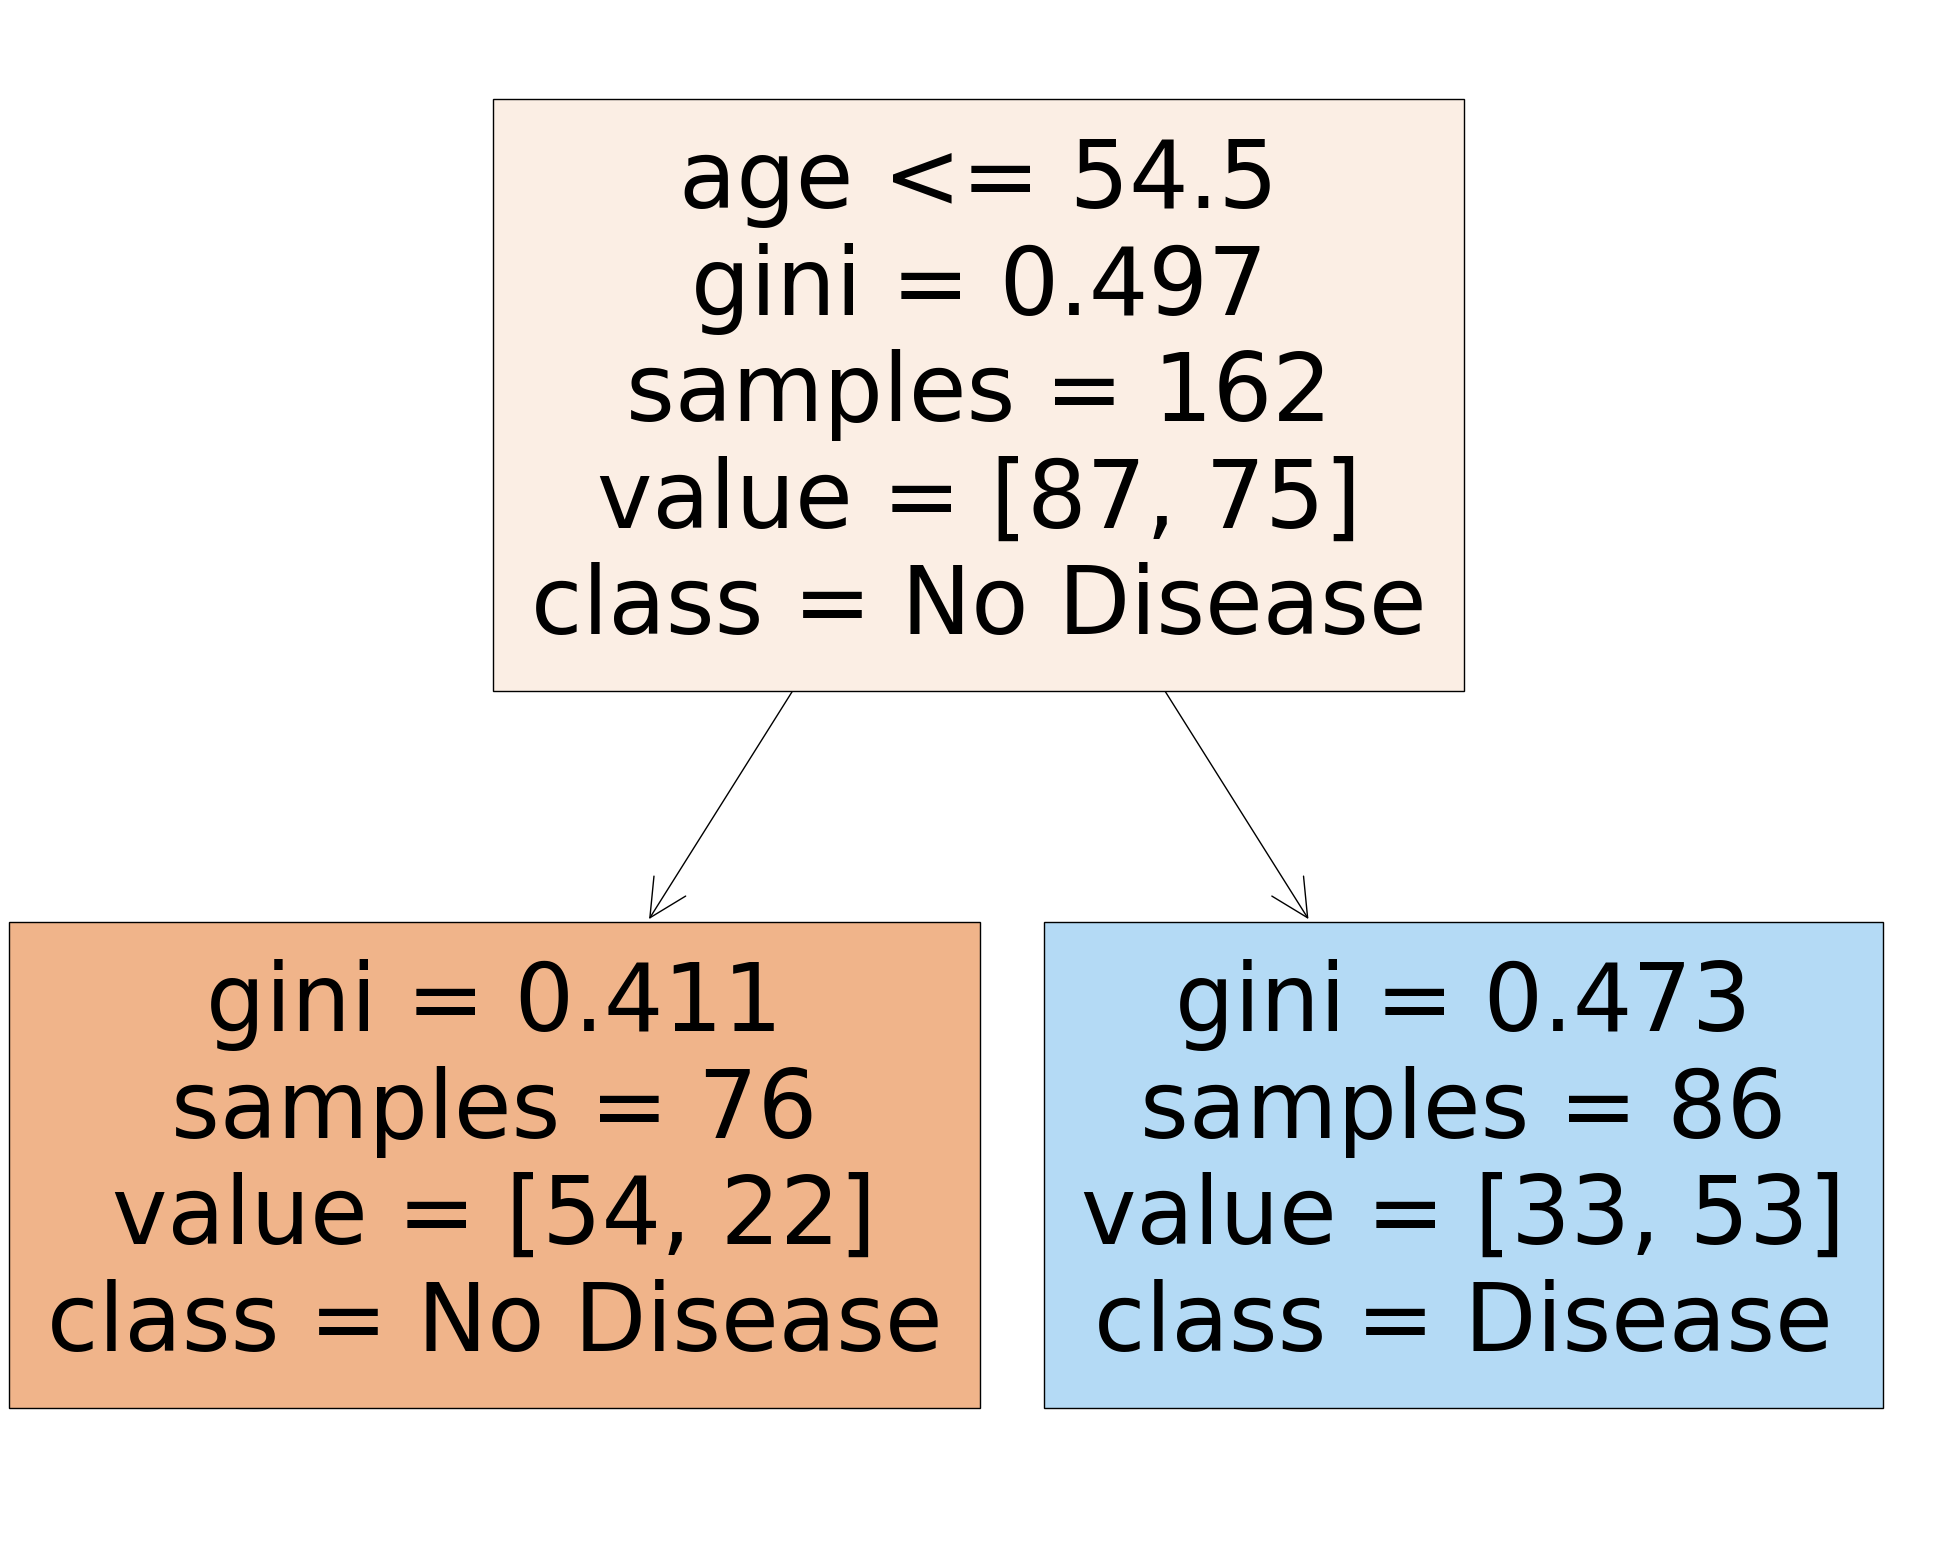

In [77]:
get_dt_graph(dt_best)

In [78]:
from sklearn.metrics import classification_report

In [79]:


print(classification_report(y_test, dt_best.predict(X_test)))



              precision    recall  f1-score   support

           0       0.68      0.60      0.64        63
           1       0.52      0.60      0.56        45

    accuracy                           0.60       108
   macro avg       0.60      0.60      0.60       108
weighted avg       0.61      0.60      0.60       108

